In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 8)

In [41]:
from sklearn.datasets import make_classification

# 3D data
X, y = make_classification(n_samples=200, 
                           n_features=3, n_redundant=0, n_informative=3, 
                           n_clusters_per_class=1,
                           class_sep=1.0,
                           scale=1.0,
                           random_state=9)

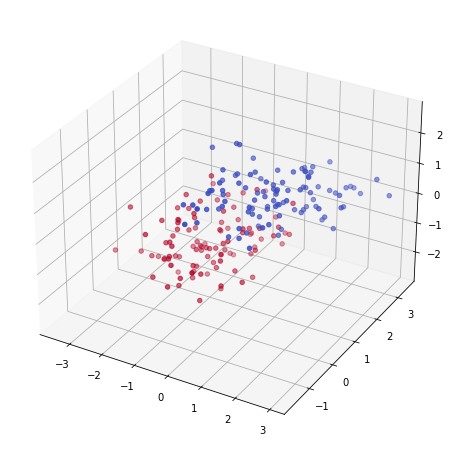

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm)

In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

z_surf = lambda x, y: (-reg.intercept_ - reg.coef_[0] * x - reg.coef_[1] * y) / reg.coef_[2]

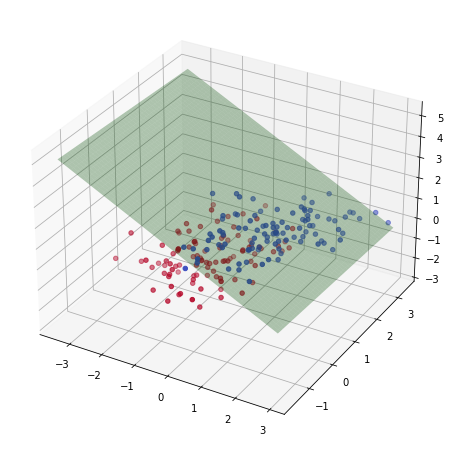

In [44]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.plot_surface(x_surf, y_surf, z_surf(x_surf, y_surf), alpha=0.3, color='g')

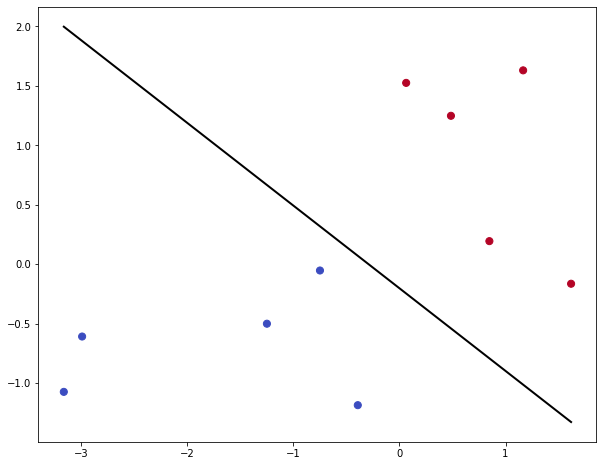

In [88]:
X, y = make_classification(n_samples=10,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=1.0,
                           scale=1.0,
                           random_state=1004
                           )

reg = LinearRegression().fit(X, y)
f = lambda x: (0.5 -reg.intercept_ - reg.coef_[0] * x) / reg.coef_[1]
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm)
plt.plot(x, f(x), 'k', lw=2)

In [87]:
from sklearn.metrics import classification_report
y_pred = reg.predict(X)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [82]:
reg.coef_

array([0.16930755, 0.24328352])